1. Setup envivronment

In [1]:
## This is a Juptyer notebook for the Kaggle Project: Abalone Regresssion

%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
## Import libaries

## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#ML Methods
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

#Palette
palette = ['#328ca9', '#0e6ea9', '#2c4ea3', '#193882', '#102446']


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2. Problem identification 

Problem statement: 

This is one of the 2024 playground competitions on Kaggle. The major goal of the project is the develop a model for predicting the age of abalone from different physical measurements.

Performance indicator:
The model performanc will be checked by the Root Mean Squared Logarithmic Error between the actual and predicted "Rings".

Reference:
Walter Reade, Ashley Chow. (2024). Regression with an Abalone Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s4e4

3. Reading data 

In [2]:
## Reading data
train_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\train.csv')#
test_df=pd.read_csv('C:\\Users\\Kai Qi Yan\\OneDrive\\文档\\GitHub\\Remote_Abalone_Regression\\Input\\test.csv')

4. Data Inspection:

Objectives:
- to examine the data structure, such as the number of rows and columns, data types, and missing values.
- to check for any obvious data quality issues, such as duplicates, outliers, or inconsistencies.

4.1 The number of features

In [3]:
# Number of columns and rows in the dataset
print(train_df.columns.values)
print(train_df.shape)

['id' 'Sex' 'Length' 'Diameter' 'Height' 'Whole weight' 'Whole weight.1'
 'Whole weight.2' 'Shell weight' 'Rings']
(90615, 10)


There are 10 columns in the data. 
The Ring is the target, id is the number of entries and others are features.
From the https://archive.ics.uci.edu/dataset/1/abalone, we obtained the following details of the features.
1. Sex: M,F,I(infant)
2. Length: longest shell distance in [mm]
3. Diameter: distance perpendicular to Length in [mm]
4. Height: the height with meat in the shell [mm]
5. Whole weight: the weight of the whole abalone(shell+meat) [g]
6. Shucked weight (named as Whole weight.1): the weight of meat [g]
7. Viscera_weight (named as Whole weight.2): the weight of gut after bleeding [g]
8. Shell weight = the weight of dried shell [g]
9. Rings = +1.5 gives the age in years (Done by cutting the shell through the cone, staining it, and counting the number of rings through a microscope)

In the training dataset, there are 90515 entries of data.

In [4]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


4.2 Data type of the features

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


There are 1 categorial input: Sex and others are numerical. While the target "Rings" is an integer, the inputs are all floats.

4.3 Checking of missing entries and duplicates

4.3.1 Identifying and handling missing entries 

a. Count the number of missing data

In [8]:
print("TrainData\n\n",train_df.isnull().sum())
print("_"*40)
print("TestData\n\n",test_df.isnull().sum())

TrainData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64
________________________________________
TestData

 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


b. Understand the cause and type of missing data; 
- Missing Completely at Random (MCAR):
    - Handling method: Simple imputation
    - Cause: The probability of missing an entry is completely independent of the values of the variables in the dataset, as well as the unobserved data.
    - Example: a sensor malfunctions and randomly fails to record some measurements

- Missing at Random (MAR):
    - Handling method:  advanced imputation techniques
    - Cause: The probability of a data point being missing depends on the observed variables in the dataset, but not on the unobserved (missing) data.
    - Example: income data is more likely to be missing for individuals with lower education levels

- Missing Not at Random (MNAR):
    - Handling methods:  pattern mixture models or selection models
    - Causes: the probability of a data point being missing depends on the unobserved (missing) data itself.
    - Example: individuals with higher income are less likely to report their income

- Systematic Missing Data:
    - Handling methods: Simple imputation or creating Proxy variable
    - Causes: An entire variables or features are missing from the dataset, typically due to issues in data collection or data processing.
    - Example: A sensor was not installed on certain devices, resulting in the absence of data for a specific feature


c. Decide a suitable handling method.
- Simple Imputation (mean, median, mode)
- Advanced Imputation (e.g., k-nearest neighbors, regression-based, multiple imputation)
- Pattern mixture models/ Selection models

There are no missing entries (NaN) in both datasets.

4.3.2 Duplicates

In [9]:
print("TrainData","\n",train_df.duplicated().sum())
print("_"*40)
print("TestData","\n",test_df.duplicated().sum())

TrainData 
 0
________________________________________
TestData 
 0


5. Feature engineering

- to create new features that might be more informative for the machine learning model. (for linear models, creating features involving ratios maybe benefitial as they are hard to learn in linear models)

- to transform or encode existing features to improve their representation

- to identify and handle any problematic features, such as high-cardinality categorical variables or highly correlated features.
https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline

5.1 Creating new features
The following new features are included in the datasets:

1. Aspect ratio: Length/Distance. This is a shape desriptor for the abalone, which roughly represent the roundness. 

2. Ellipsoid Volume: 4/3*pi*(Length/2)*(Distance/2)*(Height/2)

3. Meat/Whole abalone ratio:

4. Gut/Meat Ratio:


ref:https://imagej.net/ij/docs/guide/146-30.html#toc-Subsection-30.7


In [10]:
def FeatureEngineering(df):
    #1 Aspect Ratio
    df['Aspect ratio'] = df['Length']/df['Diameter']

    #2 Ellipsoid Volume
    df['Volume'] = (4/3)*np.pi*(df['Length']/2)*(df['Diameter']/2)*df['Height']/2

    #3 Meat/Abalone Ratio
    df['Meat ratio'] = df['Whole weight.1']/df['Whole weight']

    #4 Gut/Meat Ratio
    df['Gut meat ratio'] = df['Whole weight.2']/df['Whole weight.1']

    #return data
    return df
#Add the new features to the data
train_df=FeatureEngineering(train_df)
test_df=FeatureEngineering(test_df)
# Drop unnecessary features
train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

There are no duplicates in both datasets.

6. Univariate Analysis

- to analyze each feature individually to understand its distribution, range, and any potential skewness or outliers.

- to Use visualizations like histograms, box plots, or kernel density plots to explore the distribution of each feature.


6.1. Numerical features

a Descriptive statistics of numerical features

In [11]:
# Descriptive statistics of numerical features
train_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,Volume,Meat ratio,Gut meat ratio
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794,1.295142,0.017200,0.430878,0.508287
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221,0.059678,0.010298,0.078802,0.104979
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.517241,0.000000,0.051724,0.012987
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000,1.262136,0.008859,0.397008,0.443974
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000,1.288889,0.016933,0.431461,0.496644
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000,1.321839,0.023437,0.464579,0.559288
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,3.923077,0.155756,4.782609,5.500000


In Height, the minimum value is 0, indicating a missing value as the height of an abalone can never be 0.
Looking at the maximum/minimum and the mean values, the large differences between the them may indicate the features are either skewed or with outliers. 
This will be check again in the distribution plot again in the later section.

b Distribution of numerical features

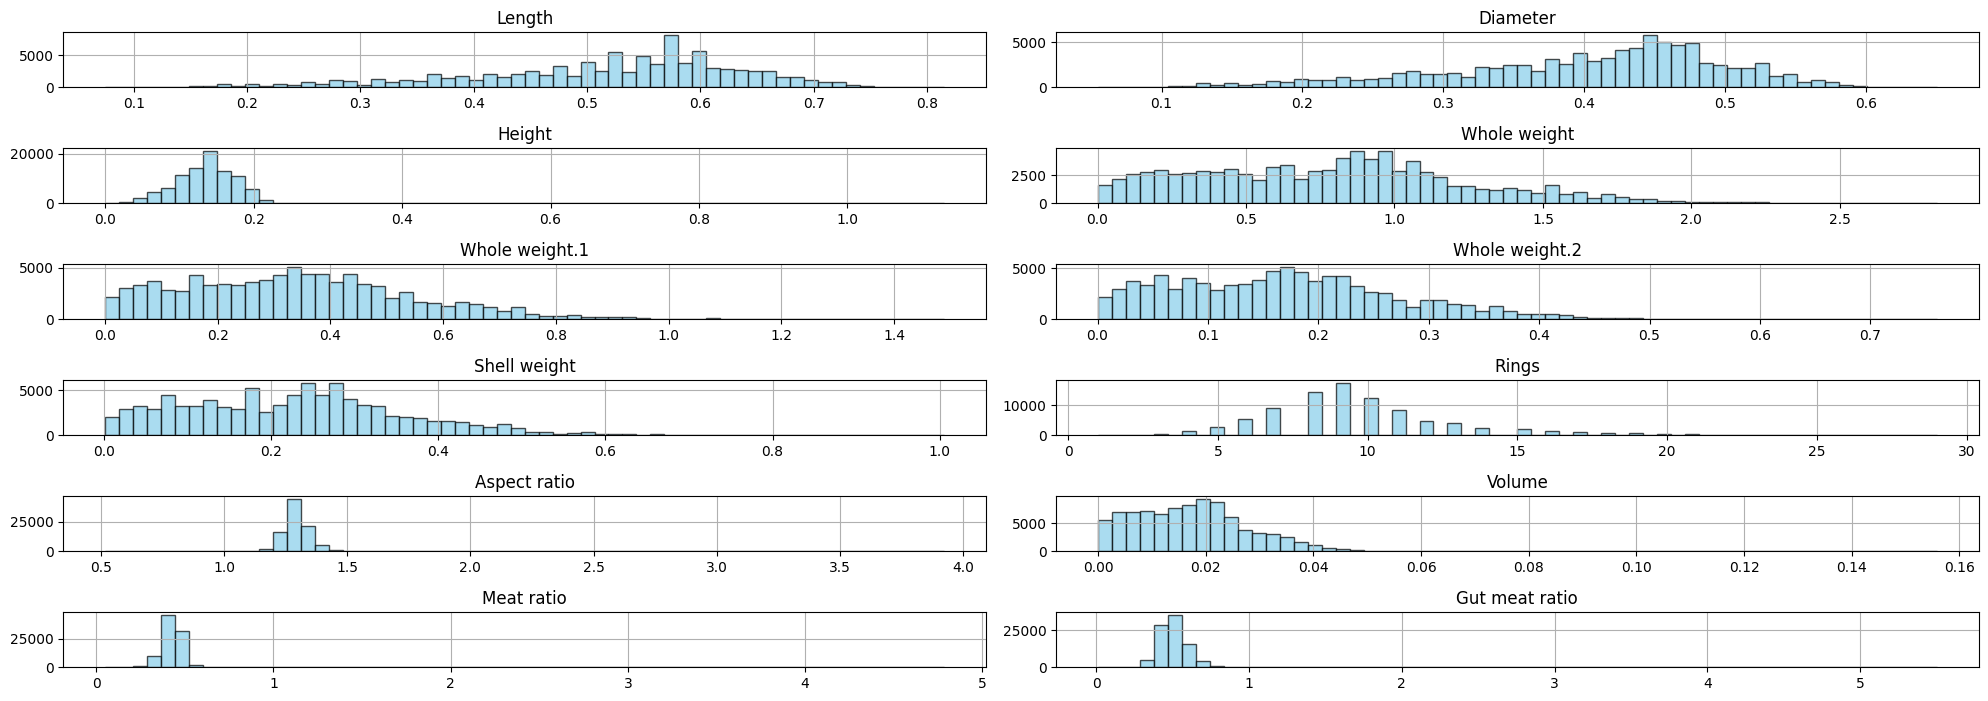

In [16]:

# plot the distribution of the feature variables
# Plot histograms of each variable
axes = train_df.hist(bins=60, figsize=(20,15), color='skyblue', edgecolor='black', alpha=0.7, layout=(len(train_df._get_numeric_data().columns)+1,2))

# Add labels
for ax, column in zip(axes.flatten(), train_df._get_numeric_data().columns):
    ax.set_title(column)

# Improve layout
plt.tight_layout()
plt.show()

c Outliers in numerical features
- Identify and visulize the outliers
- Understand the cause of outliers
    - Data entry errors
        - e.g. typos
    - Measurement error:
        - e.g. incorrect sensor calibrations
    - Execution Error: 
        - e.g. bugs in data transmission or accidental duplication of records.
    - Genuine extreme values

- Decide on the Handling Approach:
    - Retain the outliers if they are legitimate and important for the analysis.
    - Remove the outliers if they are erroneous or have a disproportionate influence on the analysis.
    - Modify the outliers by winsorizing (replacing with a less extreme value) or transforming the data.
- Evaluate the Impact
    -Assess how the outlier handling approach affects the downstream analysis and model performance.

References: 
- https://medium.com/analytics-vidhya/how-to-handle-outliers-in-machine-learning-5d8105c708e5

- https://llego.dev/posts/outlier-detection-handling-python-guide/

Identify the outliers
-> try write a python code for showcasing the outliers in each feature, figure out reasons for 
-> try add categorial feature that indicating there are outliers in the feature by ordinal encoding them as(smaller than minimum:-1, larger than maximum:+1)
    -> capping the outliers as min/max
-> show the total count of outliers in each feature (which type of outliers)

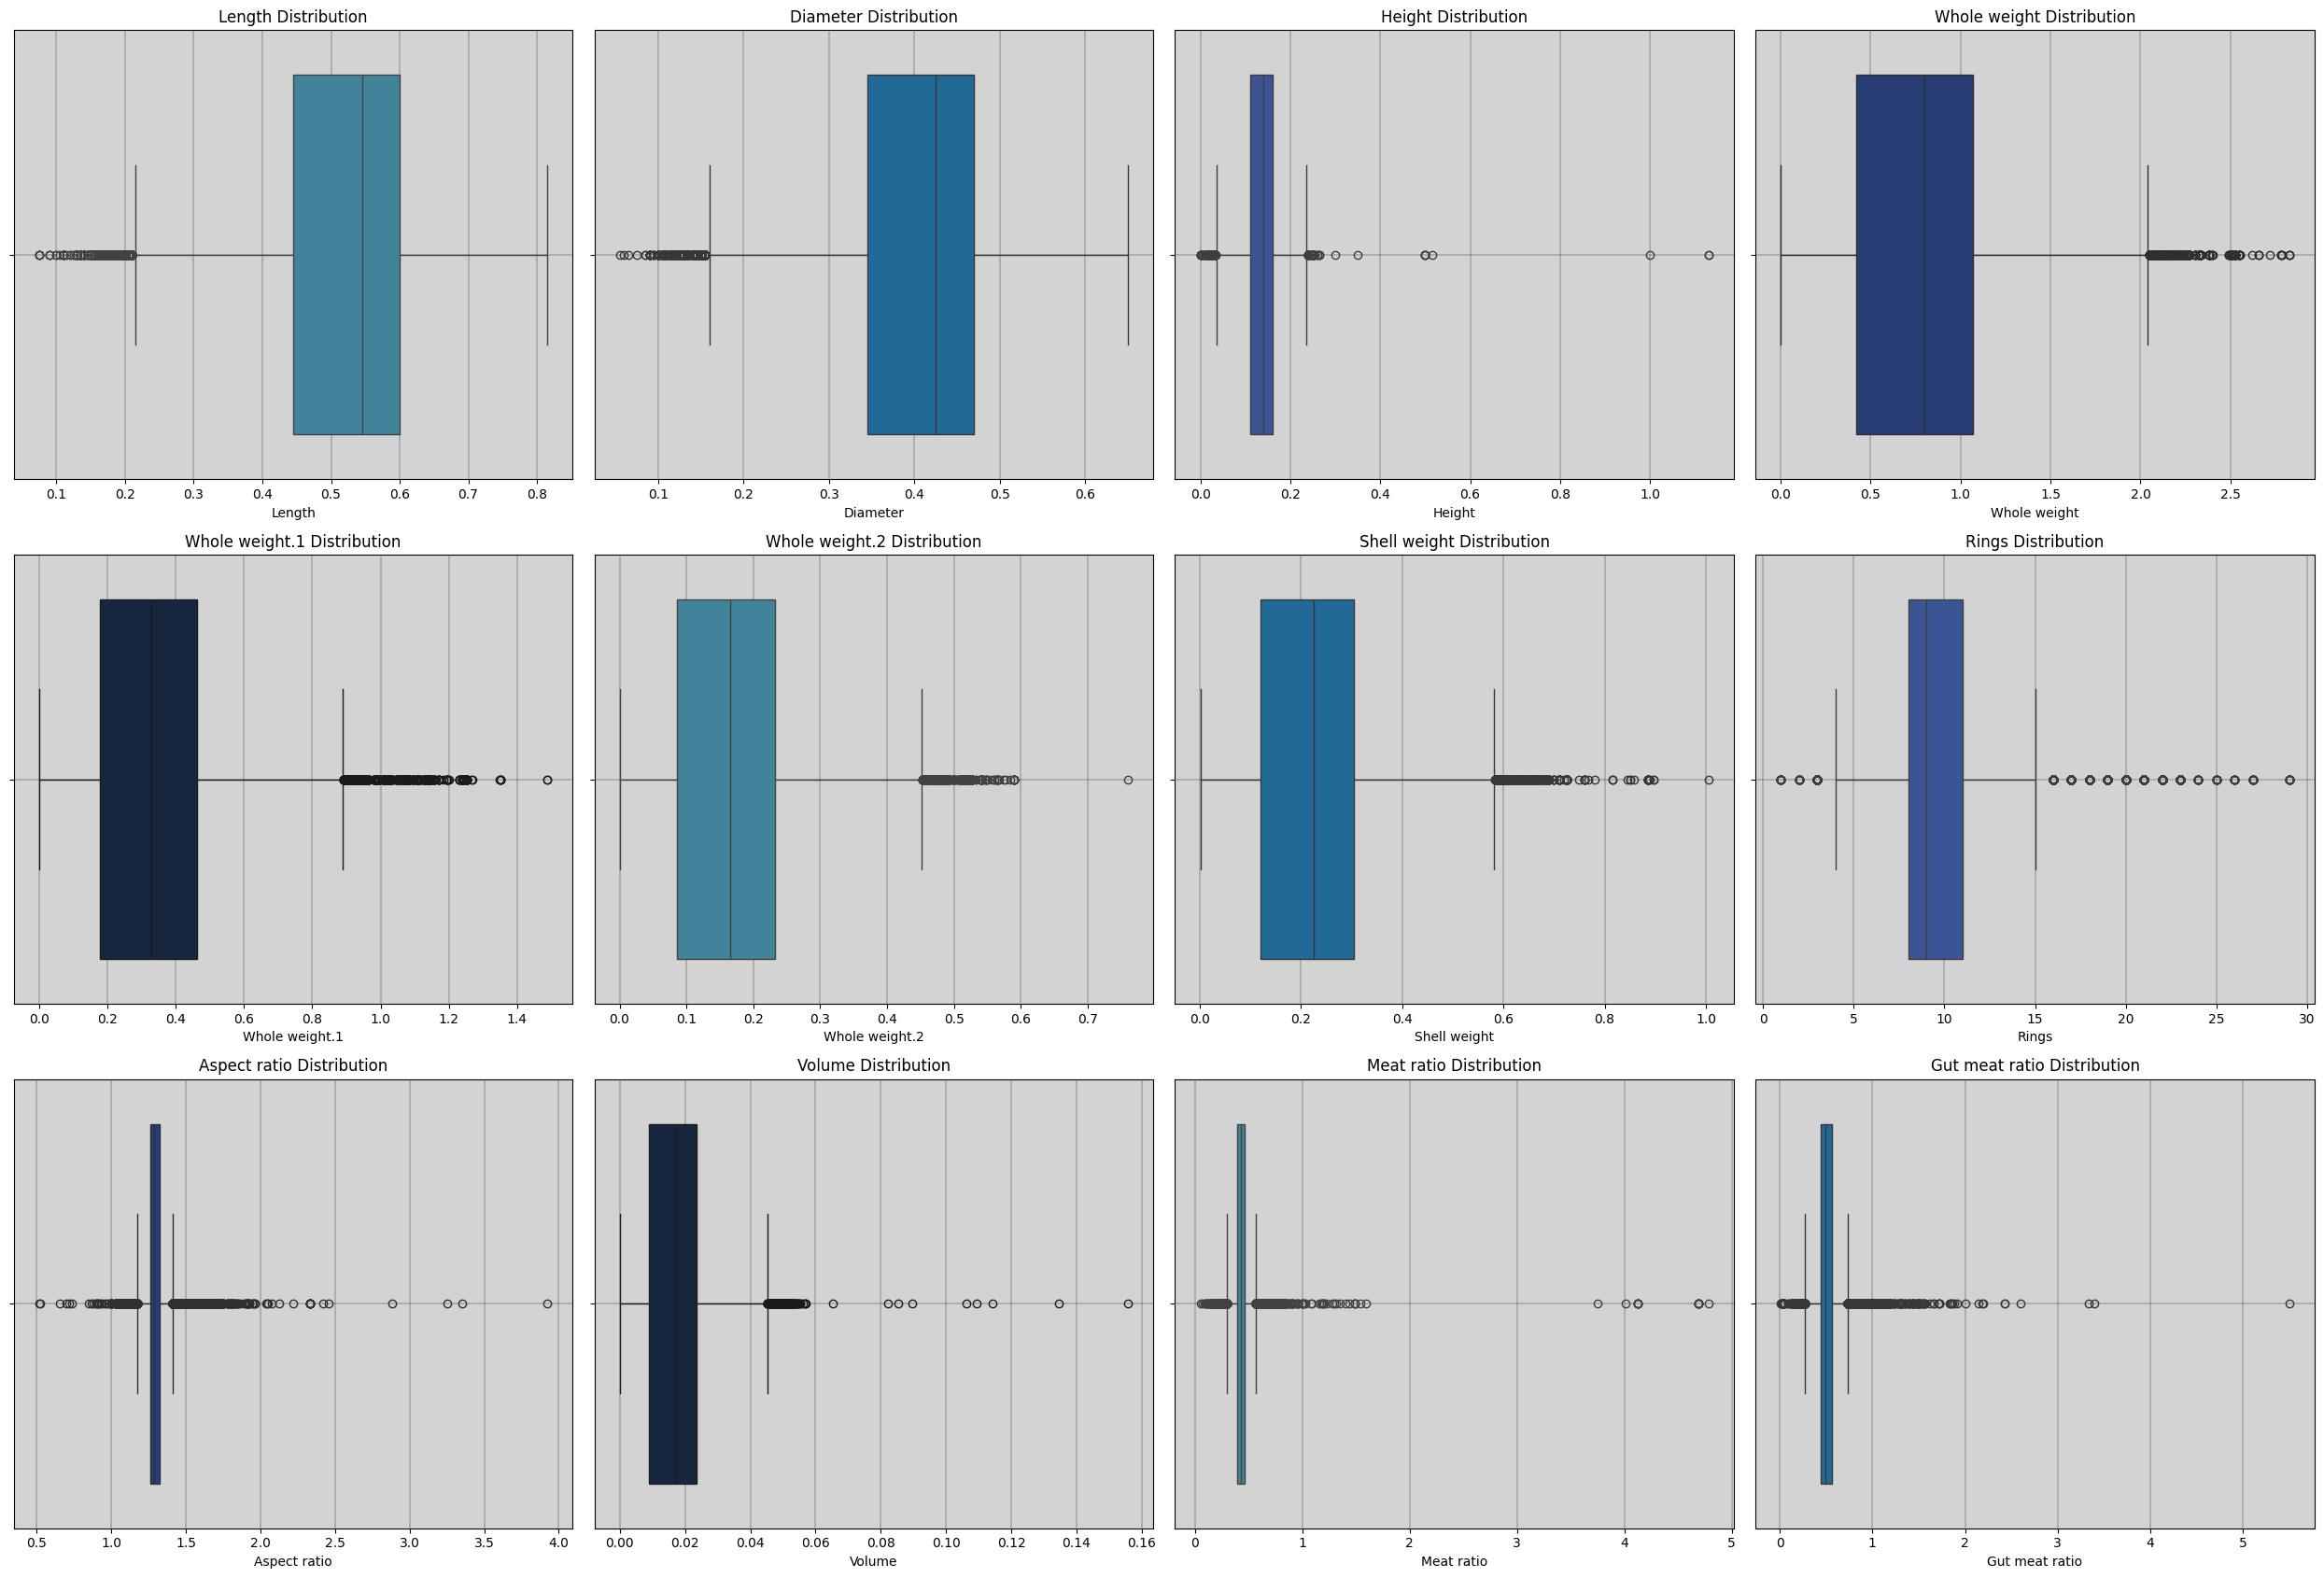

In [ ]:
#define a BOX plot function

def MultiBoxplot(df,num_cols,f_cols=4,color=palette):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))

    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.boxplot(x=j, data=df, ax=axes[i],color=color[i%5])
        axes[i].set_title(f'{j} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(num_cols) % f_cols != 0:
        for i in range(len(num_cols)%f_cols):
            fig.delaxes(axes[- i - 1])


# separate the numerical and categorical columns
num_cols = train_df._get_numeric_data().columns
cat_cols = list(set(train_df.columns) - set(num_cols))

MultiBoxplot(df=train_df,num_cols=num_cols)

In [26]:
#Outlier identifier
def OutlierIdentifier(df,num_cols=train_df._get_numeric_data().columns):
    # Loop through each numerical column
    for col in num_cols:
        # Calculate the first quartile
        Q1 = df[col].quantile(0.25)
        # Calculate the third quartile
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR

        # Set new features indicating the presence of outliers
        df[col + '_outlier'] = 0
        df.loc[df[col] < lower_bound, col + '_outlier'] = -1
        df.loc[df[col] > upper_bound, col + '_outlier'] = 1
    return df

#   initialize a new dataframe
train_OutId=train_df.copy()

#   Apply the OutlierIdentfier
OutlierIdentifier(train_OutId)

train_OutId


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,...,Height_outlier,Whole weight_outlier,Whole weight.1_outlier,Whole weight.2_outlier,Shell weight_outlier,Rings_outlier,Aspect ratio_outlier,Volume_outlier,Meat ratio_outlier,Gut meat ratio_outlier
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.279070,...,0,0,0,0,0,0,0,0,0,0
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.285714,...,0,0,0,0,0,0,0,0,0,0
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,1.454545,...,-1,0,0,0,0,0,1,0,-1,0
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,1.252632,...,0,0,0,0,0,0,0,0,0,0
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,1.305882,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,1.425532,...,0,0,0,0,0,0,1,0,0,0
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,1.305882,...,0,0,0,0,0,0,0,0,0,0
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,1.318182,...,0,0,0,0,0,0,0,0,0,0
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6,1.277778,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Outlier handling

def OutlierHandling(df,num_cols=train_df._get_numeric_data().columns):
    # Loop through each numerical column
    for col in num_cols:
        # Calculate the first quartile
        Q1 = df[col].quantile(0.25)
        # Calculate the third quartile
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR

        # Filter the outliers
        #df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Replace the outliers by the lower and upper bounds
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df

# Remove outliers from the training data
train_wo_O = train_OutId.copy()

train_wo_O=OutlierHandling(train_wo_O)


C:\Users\Kai Qi Yan\AppData\Local\Temp\ipykernel_17532\2474029984.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


In [29]:
train_wo_O

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,...,Height_outlier,Whole weight_outlier,Whole weight.1_outlier,Whole weight.2_outlier,Shell weight_outlier,Rings_outlier,Aspect ratio_outlier,Volume_outlier,Meat ratio_outlier,Gut meat ratio_outlier
0,F,0.5500,0.4300,0.150,0.7715,0.3285,0.1465,0.2400,11.0,1.279070,...,0,0,0,0,0,0,0,0,0,0
1,F,0.6300,0.4900,0.145,1.1300,0.4580,0.2765,0.3200,11.0,1.285714,...,0,0,0,0,0,0,0,0,0,0
2,I,0.2125,0.1575,0.035,0.0210,0.0055,0.0030,0.0050,6.0,1.411394,...,-1,0,0,0,0,0,1,0,-1,0
3,M,0.5950,0.4750,0.150,0.9145,0.3755,0.2055,0.2500,10.0,1.252632,...,0,0,0,0,0,0,0,0,0,0
4,I,0.5550,0.4250,0.130,0.7820,0.3695,0.1600,0.1975,9.0,1.305882,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,M,0.3350,0.2350,0.075,0.1585,0.0685,0.0370,0.0450,6.0,1.411394,...,0,0,0,0,0,0,1,0,0,0
90611,M,0.5550,0.4250,0.150,0.8790,0.3865,0.1815,0.2400,9.0,1.305882,...,0,0,0,0,0,0,0,0,0,0
90612,I,0.4350,0.3300,0.095,0.3215,0.1510,0.0785,0.0815,6.0,1.318182,...,0,0,0,0,0,0,0,0,0,0
90613,I,0.3450,0.2700,0.075,0.2000,0.0980,0.0490,0.0700,6.0,1.277778,...,0,0,0,0,0,0,0,0,0,0


In [30]:
group=train_wo_O.groupby(by='Height_outlier').min()
group

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Aspect ratio,...,Diameter_outlier,Whole weight_outlier,Whole weight.1_outlier,Whole weight.2_outlier,Shell weight_outlier,Rings_outlier,Aspect ratio_outlier,Volume_outlier,Meat ratio_outlier,Gut meat ratio_outlier
Height_outlier,,,,,,,,,,,,,,,,,,,,,
-1,I,0.2125,0.1575,0.035,0.002,0.001,0.0005,0.0015,3.5,1.172581,...,-1,0,0,0,0,-1,-1,0,-1,-1
0,F,0.2125,0.1575,0.035,0.005,0.002,0.0005,0.0015,3.5,1.172581,...,-1,0,0,0,0,-1,-1,0,-1,-1
1,F,0.5150,0.3750,0.235,0.572,0.237,0.1455,0.1500,8.0,1.172727,...,0,0,0,0,0,0,0,0,-1,0


In [ ]:
# Confirm the removal of outliers by plotting the boxplots
MultiBoxplot(df=train_wo_O,num_cols=num_cols)

6.2 Categorial features

a Distribution of categorial features

In [ ]:
# Descriptive statistics of categorical features
train_df.describe(include=['O'])

In [ ]:
# Define a function to plot the distribution of categorical features

def MultiCountplot(df, cat_cols, f_cols=4, color=palette):
    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(cat_cols):
        sns.countplot(x=j, data=df, ax=axes[i], color=color[i%5])
        axes[i].set_title(f'{j} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(cat_cols) % f_cols != 0:
        for i in range(len(cat_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the distribution of categorical features
MultiCountplot(df=train_df, cat_cols=cat_cols)

7 Bivariate analysis

- to examine the relationship between the target variable and each feature.

- to investigate the relationships between pairs of features.
    - numerical - numerical feature 
        - Regression analysis: to fit a regression (linear/polynomial/...) to the data to describe the mathematical relationship between two numerical variables
        -  Residual analysis: to examine the residuals (the differences between the observed values and the predicted values) to check the assumptions of the regression model, such as linearity, homoscedasticity, and normality.
    -   Categorial - numerical/categorial
        - analyze the relation ship between the variable by techniques such as:
            - contingency tables, 
            - chi-square tests, or 
            - ANOVA
- to utilize scatter plots, correlation matrices, or heatmaps to identify any linear or non-linear dependencies.

6.1 Hypothesis about the features relations

6.1.1. Feature - target relation:
   a. Numerical features:
   - Length:         +ve, reduced slope when rings increase
   - Diameter:       +ve, reduced slope when rings increase        
   - Height:         +ve, reduced slope when rings increase  
   - Whole weight:   +ve, reduced slope when rings increase  
   - Whole weight.1: +ve, reduced slope when rings increase
   - Whole weight.2: +ve, reduced slope when rings increase    
   - Shell weight:   +ve, reduced slope when rings increase
   - Aspect ratio:   should be fairly the same
   - Volume:         +ve, reduced slope when rings increase
   - Meat ratio:     +ve, reduced slope when rings increase
   - Gut meat ratio: +ve, reduced slope when rings increase
   b. Categorial features:
   - Sex:
      - "I" should have smaller number of rings. "M" and "F" should show no difference in ring numbers.

6.1.2. Feature - Feature relation:
   a. Numerical - numerical:
   - the dimensions desciptors: Length, Diameter, Height, and Volume: +ve
   - the weight desciptors: Whole weight, Shucked weight, Viscera_weight, Shell_weight: +ve
   - the aspect ratio: Length: +ve, Diameter: -ve
   - the Meat ratio: Whole weight.1:+ve, Whole weight:-ve
   - the Gut meat ratio: Whole weight.2:+ve, Whole weight.1: -ve

   b. Numerical- categorial:
   - "I" should have smaller Length, Diameter, Height, and Volume as well as the weights compared to "F" and "M"
   - "F" and "M" may have different distribution in terms of dimensions, weights and the ratios.

6.2 Check the numerical-numerical features/targets using Pearson correlation plot

In [ ]:
# Compute the correlation matrix
correlation_matrix = train_df[train_df._get_numeric_data().columns.tolist()].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

# Display the correlation matrix
correlation_matrix

Suprisingly the Aspect ratio has a negative correlation with the Length of the abalone, it is possible that when abalone grows, it becomes rounder and thus a decreased aspect ratio. to inspect the relation between the aspect ratio and the length, a scatter plot is plotted.

In [ ]:
# scatter plot of aspect ratio v.s. length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Aspect ratio', data=train_df, color='skyblue', hue='Length')

What does it mean?

6.2. Bivariate scatterplot with the target 

In [ ]:
# Define a scatter plot function for numerical features
def MultiScatterplot(df, num_cols, target_col, f_cols=4, color=palette, hue='Sex'):
    f_rows = np.ceil(len(num_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(num_cols):
        sns.scatterplot(x=j, y=target_col, data=df, ax=axes[i], color=color[i%5], hue=hue)
        axes[i].set_title(f'{j} vs {target_col}')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(num_cols) % f_cols != 0:
        for i in range(len(num_cols) % f_cols):
            fig.delaxes(axes[-1 - i]) 

# Plot the scatter plot of numerical features
MultiScatterplot(df=train_df, num_cols=num_cols, target_col='Rings', hue='Sex')

In [ ]:
'''

# Define a swarm plot function for categorical features
def MultiSwarmplot(df, cat_cols, target_col, f_cols=4, color=palette):
    f_rows = np.ceil(len(cat_cols)/f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    axes = axes.flatten()
    for i, j in enumerate(cat_cols):
        sns.swarmplot(x=j, y=target_col, data=df, ax=axes[i], color=color[i%5])
        axes[i].set_title(f'{j} vs {target_col}')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
        plt.tight_layout()

    # ignore the empty plots
    if len(cat_cols) % f_cols != 0:
        for i in range(len(cat_cols) % f_cols):
            fig.delaxes(axes[-1 - i])

# Plot the swarm plot of categorical features
MultiSwarmplot(df=train_df, cat_cols=cat_cols, target_col='Rings')
'''

In [ ]:
'''
# Define a bivariate scatterplot function for numerical features
def BiScatterplot(df,x, y, hue='Sex'):
    sns.scatterplot(x, y, hue=hue)
    sns.lmplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'{x} vs {y}')
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    plt.show()
'''

Would it be better to use label encoded categorial feature instead of some of the continuous features?

6.3. Mutual information plot

- to investigate the non-linear relationship among numerical features

In [ ]:
# Create Mutual Information plots

from sklearn.metrics import adjusted_mutual_info_score

# Define a function to calculate the mutual information of each pair of features in numerical columns
def calculate_mi(X, y):
    mi_scores = adjusted_mutual_info_score(X, y)
    mi_scores = pd.Series(mi_scores, name="AMI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Define a function to plot the mutual information heatmap
def plot_mi_heatmap(mi_scores):
    # Convert the mutual information scores into a DataFrame
    mi_df = pd.DataFrame(mi_scores, columns=['MI'])
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(mi_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Adjusted mutual Information Heatmap', fontsize=22)
    plt.show()

# Calculate the mutual information of each pair of features in numerical columns
for i in num_cols:
    mi_scores = calculate_mi(train_df[num_cols], train_df[i])
    plot_mi_heatmap(mi_scores)


######

abs(abs(MI)-abs(corr)) to deduce the probability of having non-linear relationship

ref: https://stats.stackexchange.com/questions/81659/mutual-information-versus-correlation

######

6.5 Conclusion from the bivariate analysis



7. Multivariate Analysis:

- to explore the interactions and relationships among multiple features simultaneously.

- to use techniques like principal component analysis (PCA) or t-SNE to identify patterns and reduce dimensionality.

- to analyze the joint distribution of features and the target variable.

7. Noramlization and Standardization

In [ ]:
# Define a function to normalize the data

def NormalizeData(df):
    # Normalize the data
    df_norm = (df - df.mean()) / df.std()
    return df_norm

# define a function to standardize the data using Box-Cox transformation
def StandardizeData(df):    
    # Standardize the data using Box-Cox transformation
    df_std = df.copy()
    for col in num_cols:
        df_std[col] = boxcox(df_std[col] + 1)[0]
    return df_std


# Standardize the data
train_std = StandardizeData(train_df[num_cols])
train_std['Rings'] = train_df['Rings']
# Normalize the data
train_norm = NormalizeData(train_std[num_cols])
train_norm['Rings'] = train_std['Rings']
    

In [ ]:
MultiBoxplot(df=train_std,num_cols=num_cols)

8. Encoding of categorial feature

9. Defining X and y for the model training

10. Preprocessing and model training

11. Correlation of the outputs from different models

12. Ensemble 

13. Hyperparameter tuning

14. Prediction